In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import PIL
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report,confusion_matrix
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
train_dir = (r"C:\Users\dell\OneDrive\Desktop\Data analytics files\xray_dataset_covid19\train")
test_dir = (r"C:\Users\dell\OneDrive\Desktop\Data analytics files\xray_dataset_covid19\test")
classes_train = os.listdir(train_dir)
classes_test = os.listdir(test_dir)

classes_train

['NORMAL', 'PNEUMONIA']

In [8]:
train_datagen = ImageDataGenerator(#zoom_range=0.2, #the amount of zooming u need
    horizontal_flip=True, # Make a horizontal copy of image
    rescale=1/255, # Normalize the new images
    width_shift_range=0.10, # The percentage of Width shifitning
    height_shift_range=0.10, # The percentage of height shifitning
    shear_range=0.1, #Shear angle in counter-clockwise direction in degrees
    fill_mode='nearest',
    rotation_range=20, 
)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size= 16,
    target_size=(1000,1000,3)[:2]
)


test_datagen=ImageDataGenerator(rescale=1/255)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size=16,
    target_size=(1000,1000,3)[:2]
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [29]:
earlystop = EarlyStopping(patience=6)
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience= 3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

callbacks = [earlystop,learning_rate_reduction]

CNN

In [30]:
model = Sequential()

model.add(Conv2D(32,(2,2),activation="relu",input_shape=(1000,1000,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(3,3))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam' ,loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 999, 999, 32)      416       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 499, 499, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 498, 498, 64)      8256      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 166, 166, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 164, 164, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 54, 54, 64)       

In [32]:
model.fit(train_gen, 
    epochs=10,
    validation_data=test_generator,
    callbacks=callbacks)

Epoch 1/10
10/10 [==============================] - 137s 13s/step - loss: 1.1123 - accuracy: 0.6014 - val_loss: 0.6307 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 2/10
10/10 [==============================] - 131s 12s/step - loss: 0.5886 - accuracy: 0.6757 - val_loss: 0.3484 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 3/10
10/10 [==============================] - 132s 13s/step - loss: 0.4586 - accuracy: 0.8041 - val_loss: 0.0668 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 4/10
10/10 [==============================] - 131s 13s/step - loss: 0.3097 - accuracy: 0.8851 - val_loss: 0.1099 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 5/10
10/10 [==============================] - 129s 12s/step - loss: 0.2504 - accuracy: 0.9054 - val_loss: 0.1185 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 6/10
10/10 [==============================] - ETA: 0s - loss: 0.3590 - accuracy: 0.8581 
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
10/10 [==============================] - 132s 13s/step

<Axes: >

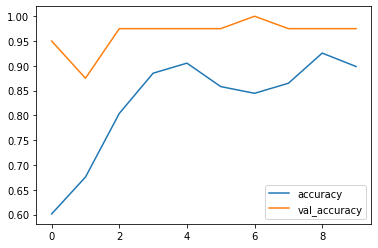

In [33]:
losses = pd.DataFrame(model.history.history)
losses[["accuracy","val_accuracy"]].plot()

<Axes: >

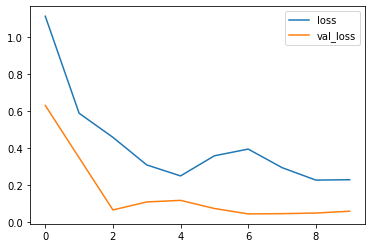

In [34]:
losses[["loss","val_loss"]].plot()

In [35]:
model.evaluate(test_generator)

3/3 [==============================] - 9s 2s/step - loss: 0.0599 - accuracy: 0.9750


[0.05985511094331741, 0.9750000238418579]

In [41]:
model.evaluate(train_gen)

10/10 [==============================] - 64s 6s/step - loss: 0.2156 - accuracy: 0.9324


[0.21562545001506805, 0.9324324131011963]

In [36]:
real= test_generator.classes
real

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
predictions = model.predict_generator(test_generator) > 0.5
predictions

array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True]])

<Axes: >

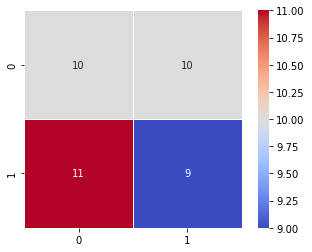

In [39]:
con = confusion_matrix(real,predictions)
sns.heatmap(con,cmap="coolwarm",annot=True,fmt="d",linewidths=1,square=True)

In [40]:
print(classification_report(real,predictions))

              precision    recall  f1-score   support

           0       0.48      0.50      0.49        20
           1       0.47      0.45      0.46        20

    accuracy                           0.48        40
   macro avg       0.47      0.47      0.47        40
weighted avg       0.47      0.47      0.47        40

